In [64]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("scales")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [3]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_local", "cor_size_200bp_step_50bp", "summary")
fname = "cor.pLog2FC.combine.summary.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_rolling_cor = dat
print(dim(dat))
head(dat)

[1] 417   4


Peak,cor_astarr_wstarr,cor_astarr_tmpra,cor_wstarr_tmpra
<chr>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,-0.18127468,-0.21115912,-0.21716299
chr11_61560645_61561556,0.17339053,-0.12360605,0.10435204
chr11_61567108_61567997,0.26138151,0.25041520,0.01814805
chr11_61580592_61581826,0.43116637,0.08971366,-0.25060078
chr11_61587170_61588742,0.14679704,-0.09365859,0.01170847
chr11_61594868_61596571,0.01351688,-0.41569520,0.08414937


In [4]:
fdiry = file.path(FD_RES, "results", "comparison", "comparison_global")
fname = "result.rank_diff.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)

dat_rank_diff = dat
print(dim(dat))
head(dat)

[1] 417  11


Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,rank_ASTARR,rank_WSTARR,rank_TMPRA,rank_diff_ASTARR_WSTARR,rank_diff_ASTARR_TMPRA,rank_diff_WSTARR_TMPRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,4,4,8,0,-4,-4
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,10,13,4,-3,6,9
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,15,7,15,8,0,-8
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,8,12,20,-4,-12,-8
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,3,19,14,-16,-11,5
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,14,17,22,-3,-8,-5


In [78]:
mat = dat %>% dplyr::select(rank_ASTARR, rank_WSTARR, rank_TMPRA)
mat = cor(mat, method = "spearman")
mat

,rank_ASTARR,rank_WSTARR,rank_TMPRA
rank_ASTARR,1.0000000,0.5250446,0.5332423
rank_WSTARR,0.5250446,1.0000000,0.6148272
rank_TMPRA,0.5332423,0.6148272,1.0000000


In [81]:
### https://stackoverflow.com/questions/31677923/set-0-point-for-pheatmap-in-r
paletteLength <- 50
myColor = colorRampPalette(c("white", "#ef3b2c"))(paletteLength)
myBreaks <- c(
    seq(
        0, 
        max(mat), 
        length.out=paletteLength)
)

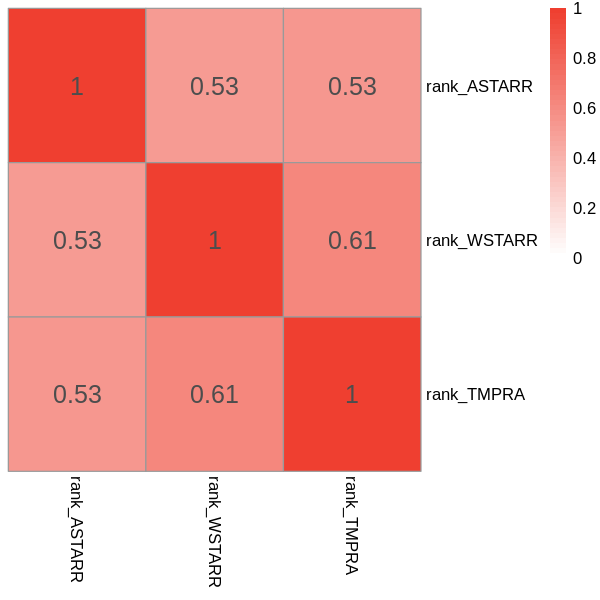

In [83]:
options(repr.plot.height=5, repr.plot.width=5)
pheatmap(mat, color=myColor, breaks=myBreaks, display_numbers = round(mat,2), fontsize_number=15, 
         cluster_rows = FALSE, cluster_cols = FALSE)

In [69]:
mat = dat %>% dplyr::select(starts_with("rank"))
mat = cor(mat, method = "spearman")
mat

,rank_ASTARR,rank_WSTARR,rank_TMPRA,rank_diff_ASTARR_WSTARR,rank_diff_ASTARR_TMPRA,rank_diff_WSTARR_TMPRA
rank_ASTARR,1.000000000,0.52504460,0.53324231,0.47069902,0.46359489,0.001062261
rank_WSTARR,0.525044603,1.00000000,0.61482724,-0.46493074,-0.07724425,0.416754309
rank_TMPRA,0.533242314,0.61482724,1.00000000,-0.07474961,-0.46174094,-0.425106920
rank_diff_ASTARR_WSTARR,0.470699016,-0.46493074,-0.07474961,1.00000000,0.54992744,-0.427531056
rank_diff_ASTARR_TMPRA,0.463594889,-0.07724425,-0.46174094,0.54992744,1.00000000,0.440992653
rank_diff_WSTARR_TMPRA,0.001062261,0.41675431,-0.42510692,-0.42753106,0.44099265,1.000000000


In [70]:
### https://stackoverflow.com/questions/31677923/set-0-point-for-pheatmap-in-r
paletteLength <- 50
myColor = colorRampPalette(c("#6baed6", "#9ecae1", "#e0f3f8", "white", "#ffffbf", "#f46d43", "#d73027"))(paletteLength)
myBreaks <- c(
    seq(
        -0.5, 
        0, 
        length.out=ceiling(paletteLength/2) + 1), 
    seq(
        max(mat)/paletteLength, 
        max(mat), 
        length.out=floor(paletteLength/2))
)

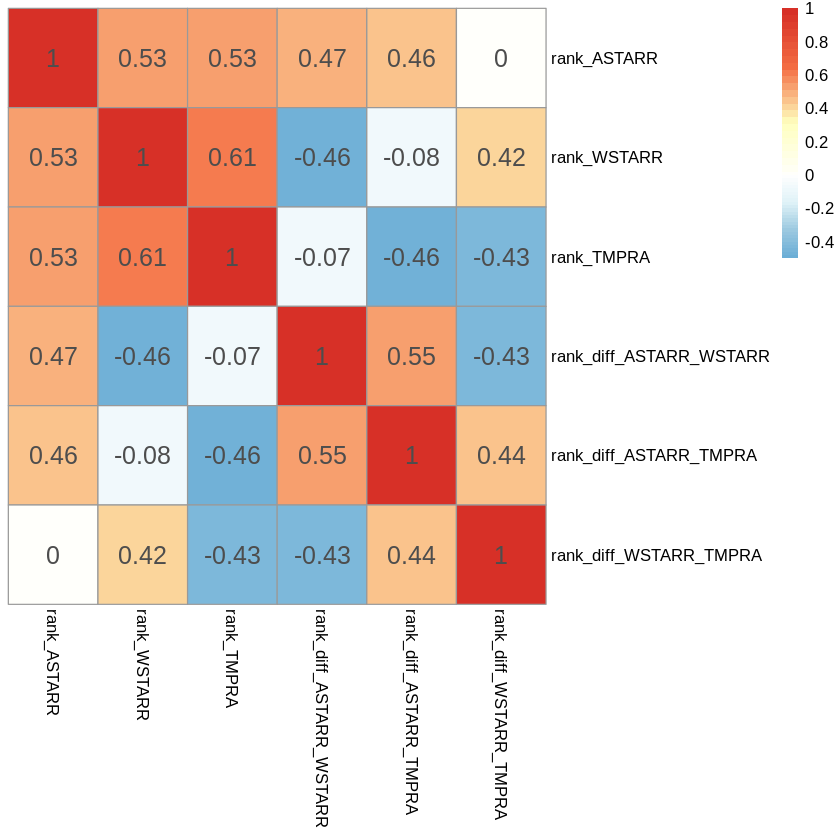

In [71]:
options(repr.plot.height=7, repr.plot.width=7)
pheatmap(mat, color=myColor, breaks=myBreaks, display_numbers = round(mat,2), fontsize_number=15, 
         cluster_rows = FALSE, cluster_cols = FALSE)

In [94]:
mat = dat %>% 
    dplyr::mutate(
        ASTARR_Log2FC_Abs = abs(KS91_K562_ASTARRseq),
        WSTARR_Log2FC_Abs = abs(A001_K562_WSTARRseq),
        TMPRA_Log2FC_Abs  = abs(Tewhey_K562_TileMPRA)) %>%
    dplyr::select(
        ASTARR_Log2FC_Abs, WSTARR_Log2FC_Abs, TMPRA_Log2FC_Abs,
        rank_diff_ASTARR_WSTARR, rank_diff_ASTARR_TMPRA, rank_diff_WSTARR_TMPRA)
mat = cor(mat, method = "spearman")
mat = mat[
    c("ASTARR_Log2FC_Abs", "WSTARR_Log2FC_Abs", "TMPRA_Log2FC_Abs"),
    c("rank_diff_ASTARR_WSTARR", "rank_diff_ASTARR_TMPRA", "rank_diff_WSTARR_TMPRA")
]
mat

,rank_diff_ASTARR_WSTARR,rank_diff_ASTARR_TMPRA,rank_diff_WSTARR_TMPRA
ASTARR_Log2FC_Abs,-0.12457070,-0.15085679,-0.04989841
WSTARR_Log2FC_Abs,-0.03878605,-0.08893357,-0.03386653
TMPRA_Log2FC_Abs,-0.15863002,-0.16785815,-0.04130021


In [99]:
mat = dat %>% 
    dplyr::mutate(
        ASTARR_Log2FC_Squared = KS91_K562_ASTARRseq^2,
        WSTARR_Log2FC_Squared = A001_K562_WSTARRseq^2,
        TMPRA_Log2FC_Squared  = Tewhey_K562_TileMPRA^2) %>%
    dplyr::select(
        ASTARR_Log2FC_Squared, WSTARR_Log2FC_Squared, TMPRA_Log2FC_Squared,
        rank_diff_ASTARR_WSTARR, rank_diff_ASTARR_TMPRA, rank_diff_WSTARR_TMPRA)
mat = cor(mat, method = "spearman")
mat = mat[
    c("rank_diff_ASTARR_WSTARR", "rank_diff_ASTARR_TMPRA", "rank_diff_WSTARR_TMPRA"),
    c("ASTARR_Log2FC_Squared", "WSTARR_Log2FC_Squared", "TMPRA_Log2FC_Squared")
]
head(mat)

,ASTARR_Log2FC_Squared,WSTARR_Log2FC_Squared,TMPRA_Log2FC_Squared
rank_diff_ASTARR_WSTARR,-0.12457070,-0.03878605,-0.15863002
rank_diff_ASTARR_TMPRA,-0.15085679,-0.08893357,-0.16785815
rank_diff_WSTARR_TMPRA,-0.04989841,-0.03386653,-0.04130021


In [106]:
### https://stackoverflow.com/questions/31677923/set-0-point-for-pheatmap-in-r
paletteLength <- 50
myColor = colorRampPalette(c("#6baed6", "#9ecae1", "#e0f3f8", "white"))(paletteLength)
myBreaks <- c(
    seq(
        -0.3, 
        0, 
        length.out=paletteLength))

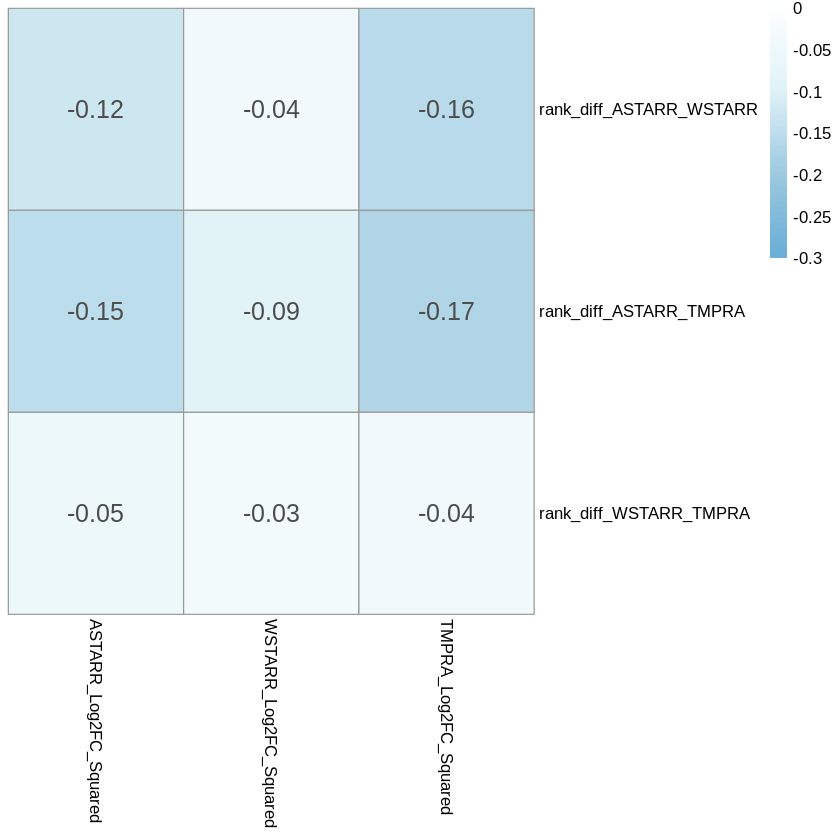

In [107]:
options(repr.plot.height=7, repr.plot.width=7)
pheatmap(mat, color=myColor, breaks=myBreaks, display_numbers = round(mat,2), fontsize_number=15, 
         cluster_rows = FALSE, cluster_cols = FALSE)

In [9]:
dat_comb = full_join(dat_rank_diff, dat_rolling_cor, by="Peak")
dat_comb$Label = ifelse(dat$Peak == "chrX_48782524_48783758", "1", "0")
head(dat_comb)

Peak,Region,KS91_K562_ASTARRseq,A001_K562_WSTARRseq,Tewhey_K562_TileMPRA,rank_ASTARR,rank_WSTARR,rank_TMPRA,rank_diff_ASTARR_WSTARR,rank_diff_ASTARR_TMPRA,rank_diff_WSTARR_TMPRA,cor_astarr_wstarr,cor_astarr_tmpra,cor_wstarr_tmpra,Label
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11_61554569_61556228,FADS,-0.89731811,-0.157723497,-0.15339793,4,4,8,0,-4,-4,-0.18127468,-0.21115912,-0.21716299,0
chr11_61560645_61561556,FADS,-0.33300518,0.042626535,-0.44589478,10,13,4,-3,6,9,0.17339053,-0.12360605,0.10435204,0
chr11_61567108_61567997,FADS,-0.03523130,-0.097785489,0.23849061,15,7,15,8,0,-8,0.26138151,0.25041520,0.01814805,0
chr11_61580592_61581826,FADS,-0.56224848,-0.004937959,1.98128430,8,12,20,-4,-12,-8,0.43116637,0.08971366,-0.25060078,0
chr11_61587170_61588742,FADS,-0.93990159,0.240565387,0.09901037,3,19,14,-16,-11,5,0.14679704,-0.09365859,0.01170847,0
chr11_61594868_61596571,FADS,-0.03754519,0.171364579,2.30957456,14,17,22,-3,-8,-5,0.01351688,-0.41569520,0.08414937,0


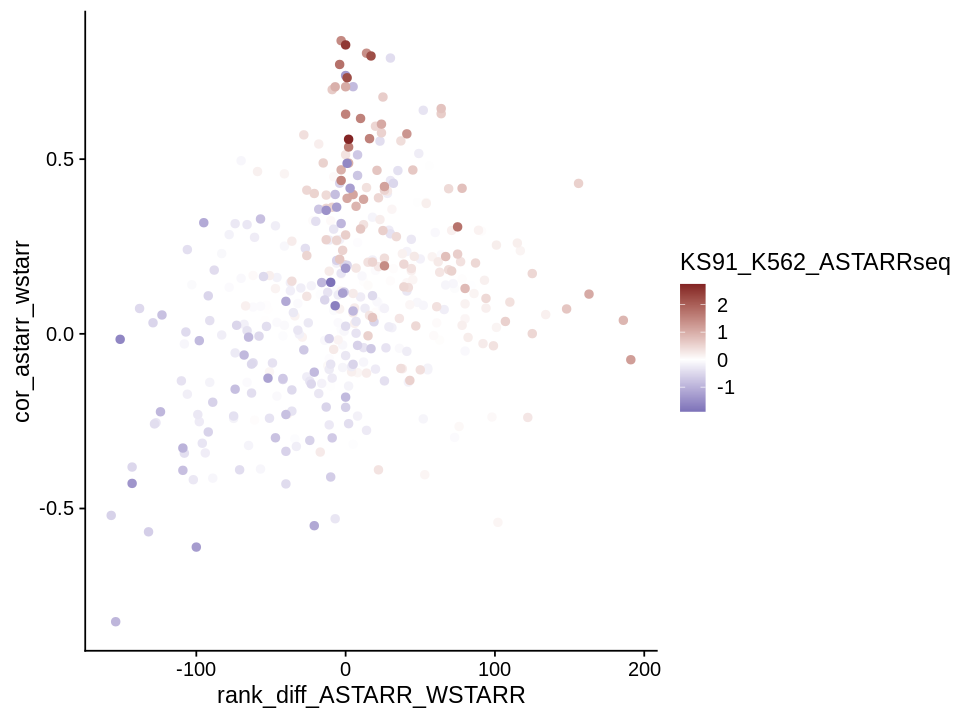

In [46]:
dat = dat_comb
dat = dat %>% arrange(abs(KS91_K562_ASTARRseq))
gpt = ggplot(dat, aes(x=rank_diff_ASTARR_WSTARR, y=cor_astarr_wstarr, color=KS91_K562_ASTARRseq)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

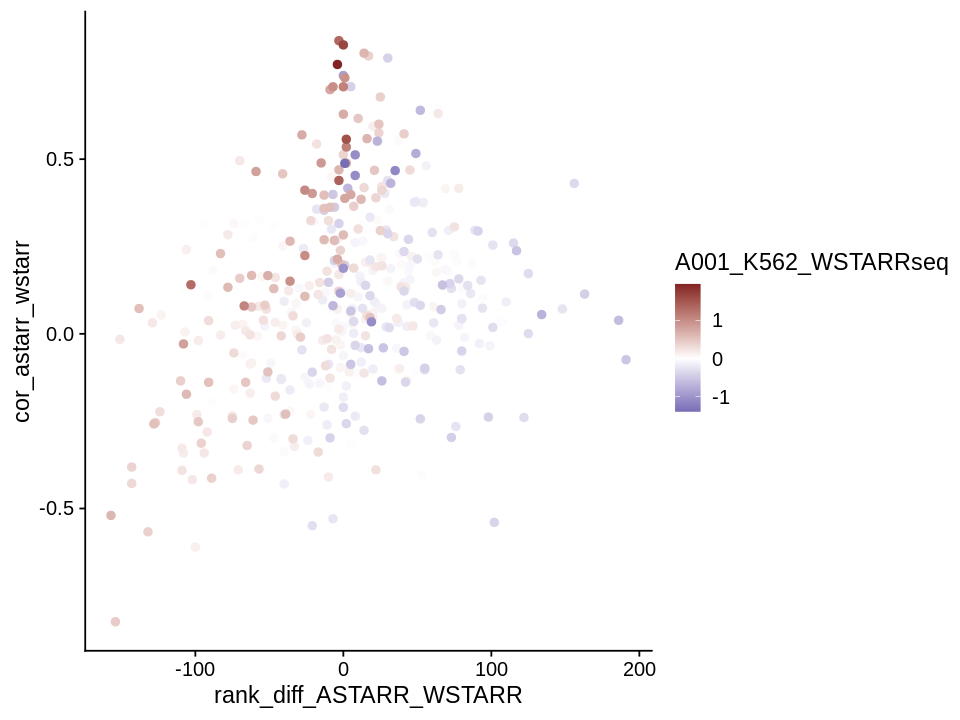

In [47]:
dat = dat_comb
dat = dat %>% arrange(abs(A001_K562_WSTARRseq))
gpt = ggplot(dat, aes(x=rank_diff_ASTARR_WSTARR, y=cor_astarr_wstarr, color=A001_K562_WSTARRseq)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

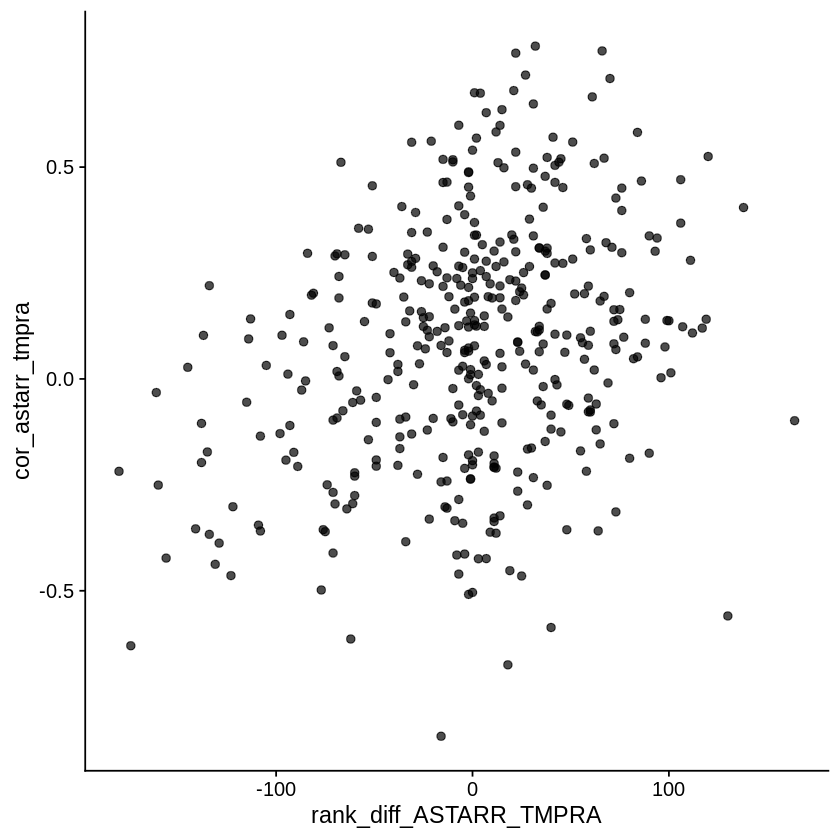

In [18]:
dat = dat_comb
gpt = ggplot(dat, aes(x=rank_diff_ASTARR_TMPRA, y=cor_astarr_tmpra)) + 
    geom_point(size=2, alpha=0.7) + 
    theme_cowplot()

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

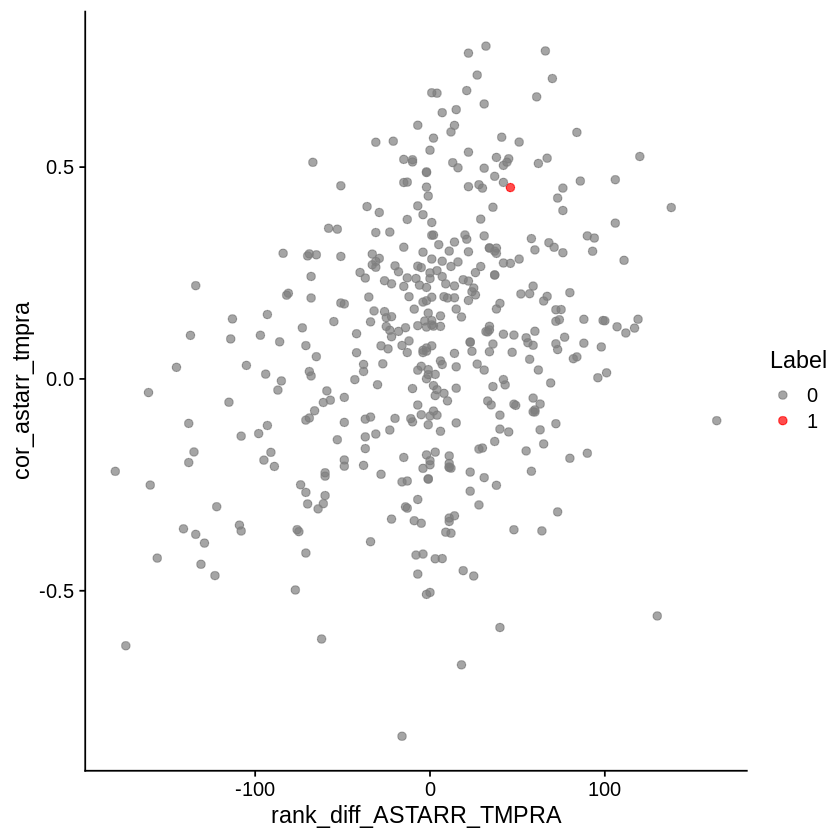

In [19]:
dat = dat_comb
gpt = ggplot(dat, aes(x=rank_diff_ASTARR_TMPRA, y=cor_astarr_tmpra, color=Label)) + 
    geom_point(size=2, alpha=0.7) + 
    scale_color_manual(values = c("1" = "red", "0" = "grey50")) +
    theme_cowplot()

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

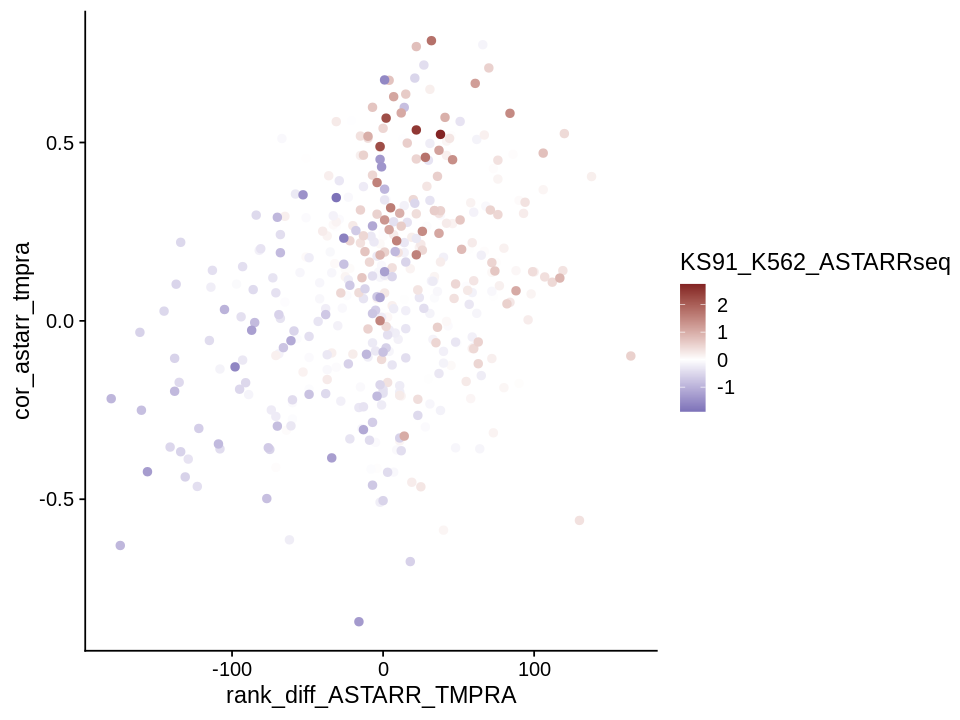

In [110]:
dat = dat_comb
dat = dat %>% arrange(abs(KS91_K562_ASTARRseq))
gpt = ggplot(dat, aes(x=rank_diff_ASTARR_TMPRA, y=cor_astarr_tmpra, color=KS91_K562_ASTARRseq)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

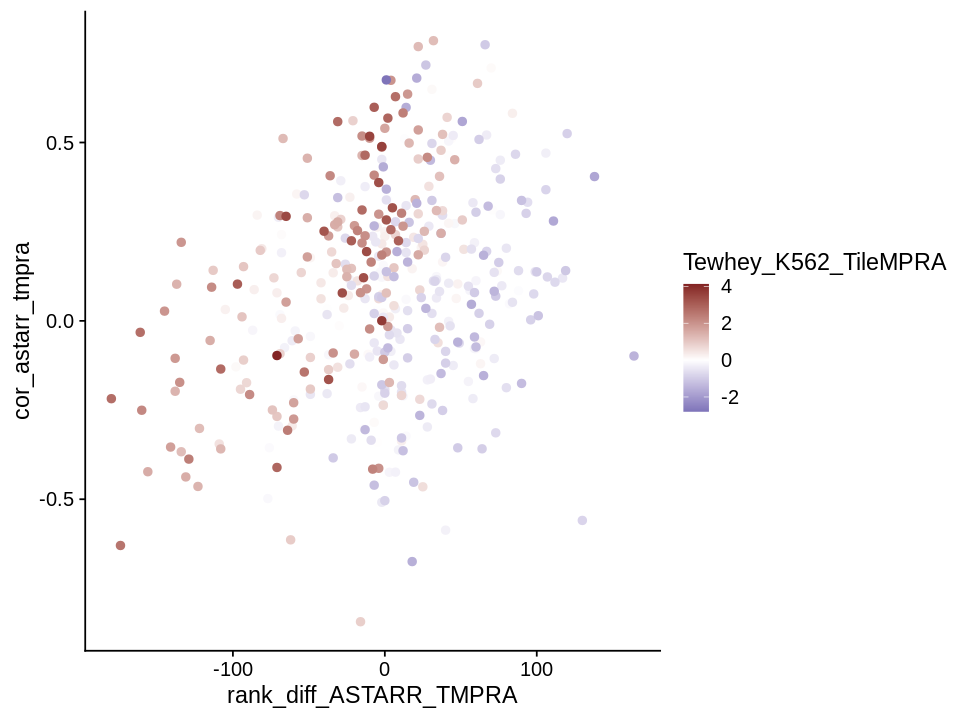

In [112]:
dat = dat_comb
dat = dat %>% arrange(abs(Tewhey_K562_TileMPRA))
gpt = ggplot(dat, aes(x=rank_diff_ASTARR_TMPRA, y=cor_astarr_tmpra, color=Tewhey_K562_TileMPRA)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

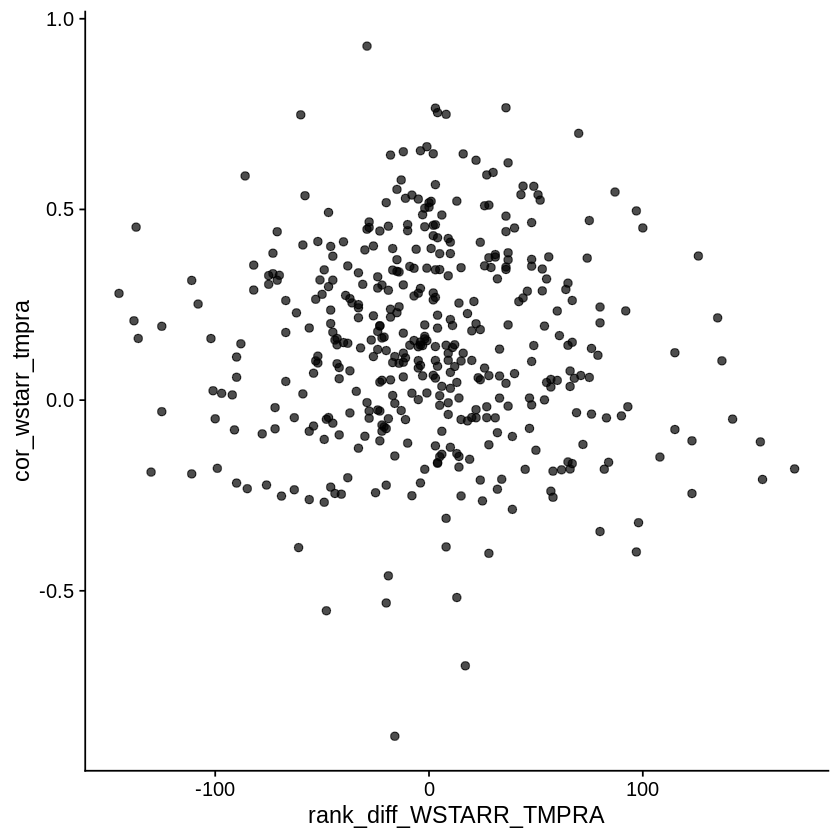

In [20]:
dat = dat_comb
gpt = ggplot(dat, aes(x=rank_diff_WSTARR_TMPRA, y=cor_wstarr_tmpra)) + 
    geom_point(size=2, alpha=0.7) + 
    theme_cowplot()

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

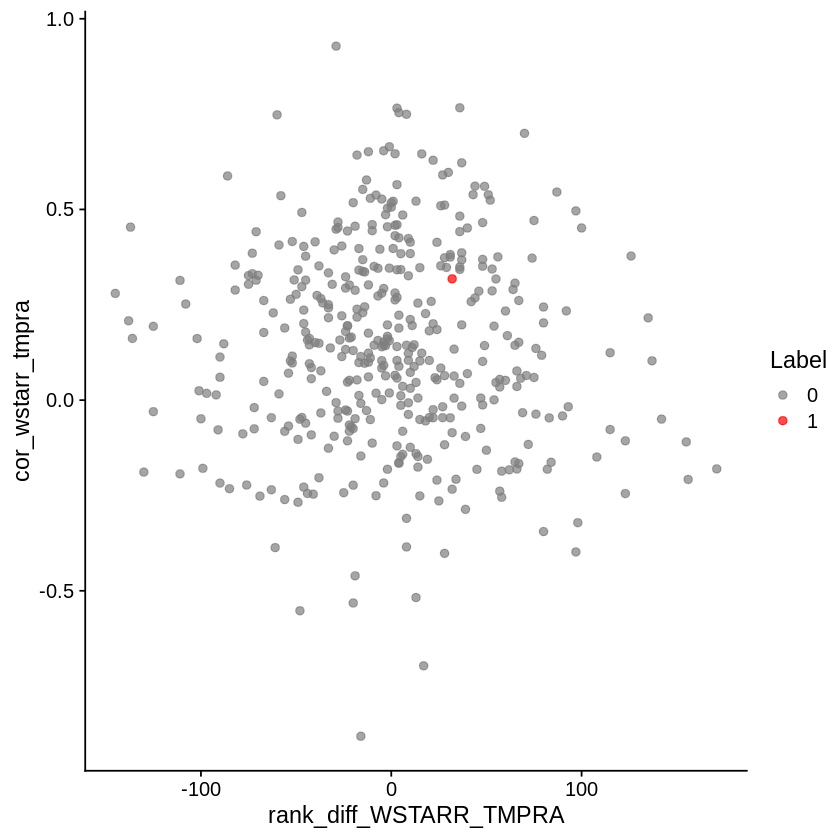

In [51]:
dat = dat_comb
gpt = ggplot(dat, aes(x=rank_diff_WSTARR_TMPRA, y=cor_wstarr_tmpra, color=Label)) + 
    geom_point(size=2, alpha=0.7) + 
    scale_color_manual(values = c("1" = "red", "0" = "grey50")) +
    theme_cowplot()

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

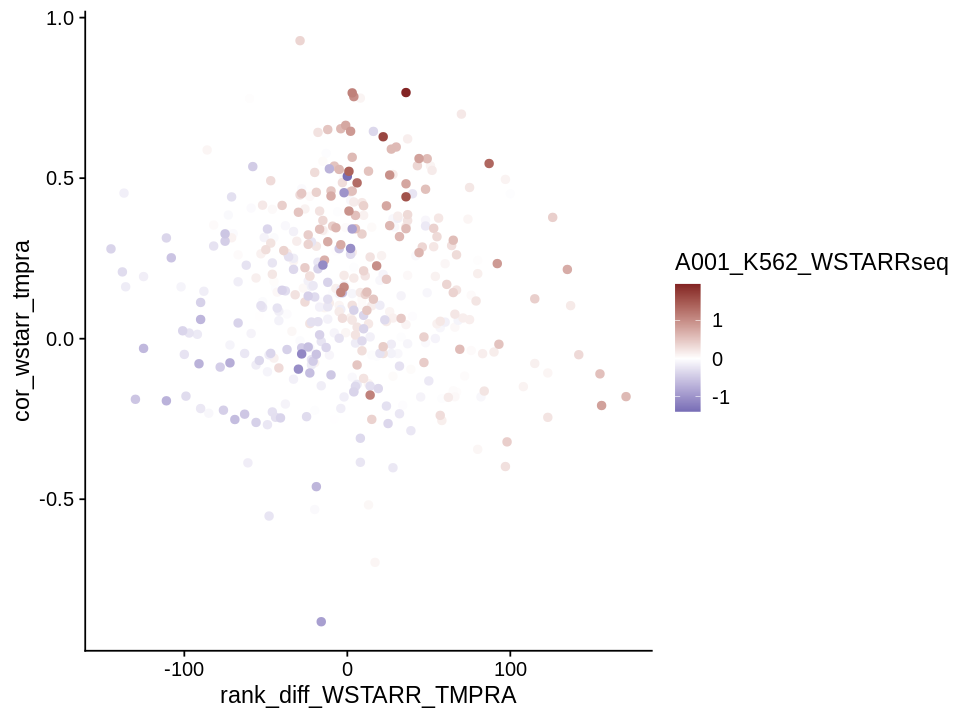

In [60]:
dat = dat_comb
dat = dat %>% arrange(abs(A001_K562_WSTARRseq))
gpt = ggplot(dat, aes(x=rank_diff_WSTARR_TMPRA, y=cor_wstarr_tmpra, color=A001_K562_WSTARRseq)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()
    

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

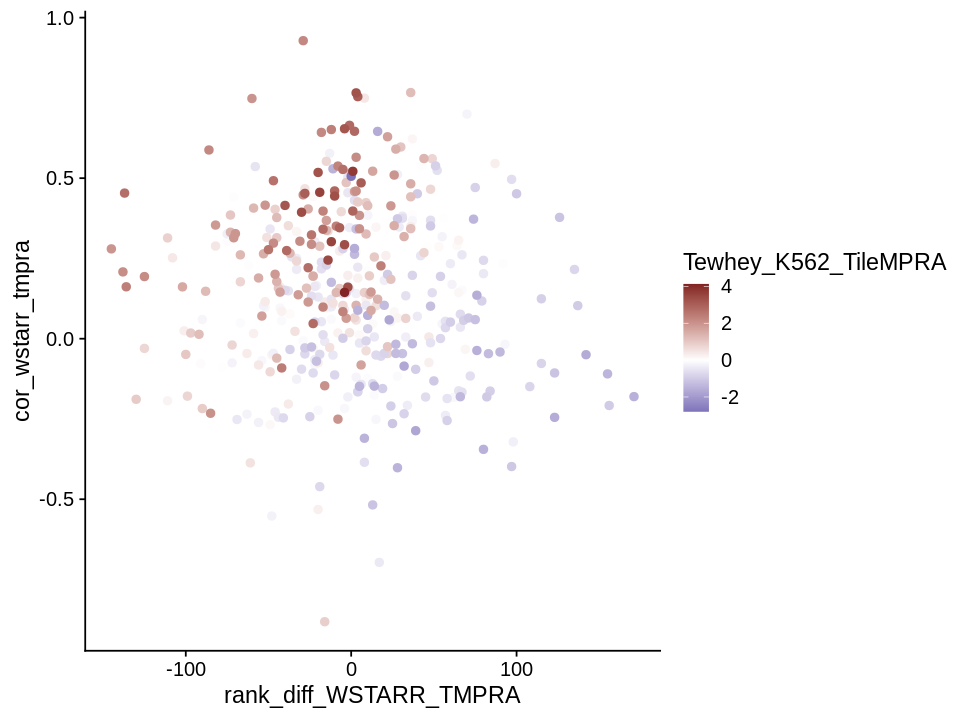

In [61]:
dat = dat_comb
dat = dat %>% arrange(abs(Tewhey_K562_TileMPRA))
gpt = ggplot(dat, aes(x=rank_diff_WSTARR_TMPRA, y=cor_wstarr_tmpra, color=Tewhey_K562_TileMPRA)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

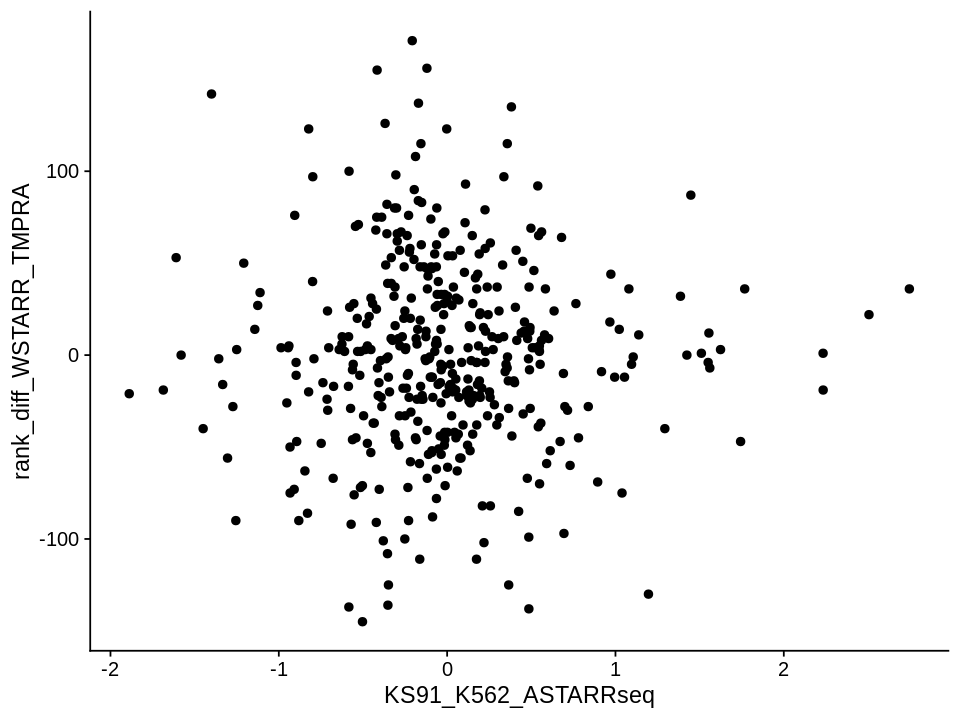

In [57]:
dat = dat_comb
dat = dat %>% arrange(abs(KS91_K562_ASTARRseq))
gpt = ggplot(dat, aes(x=KS91_K562_ASTARRseq, y=rank_diff_WSTARR_TMPRA)) + 
    geom_point(size=2) + 
    scale_color_gradient2(
        low  = muted("blue"),
        mid  = "white",
        high = muted("red")
    ) +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)